Importing libraries

In [67]:
import numpy as np
from pylab import meshgrid,cm,imshow,show
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

Initializing variables

In [68]:
nParticles = 10
vmin = -2
vmax = 2
vx = np.random.uniform(vmin, vmax, nParticles)
vy = np.random.uniform(vmin, vmax, nParticles)
t = 1

vx, vy

(array([ 1.36055961,  0.02940023,  1.21913172, -1.28082932,  0.99239266,
        -1.2584871 ,  0.53992411, -1.53267395,  0.16079503, -1.18550572]),
 array([-0.70297786,  1.07605998,  1.74527159,  0.369143  ,  0.83141579,
        -1.35159751, -0.6476108 ,  1.05944608,  0.73991348,  0.11923553]))

Defining the function $f(x,y)=(1-x)^2+100(y-x^2)^2$

In [69]:
def f(x, y):
    return (1-x)**2 + 100*(y-(x**2))**2

Initializing 21 pair random particles betwen the range -5, 5

In [70]:
positions = np.random.uniform(-5, 5, ((nParticles, 2)))
positions

array([[ 0.82091979,  2.28945403],
       [ 2.85352901, -3.78749735],
       [-3.73016048,  2.31132806],
       [ 3.4613571 ,  1.31964418],
       [ 3.10080006, -2.96075667],
       [-2.71372283, -1.32804996],
       [ 3.71584511,  3.77884856],
       [-1.23183777,  3.89407897],
       [ 1.23244353, -3.8742533 ],
       [ 2.37086118, -4.51977074]])

In [71]:
bestPos = positions #making the pre-loop best individual positions same as positions

In [72]:
max_it = 1000 #Initializing the max number of iterations

Main loop

In [73]:
evalPos = np.array([int(f(positions[particle, 0], positions[particle, 1])) for particle in range(nParticles)]) #gettig the pre-loop particles performances
#print(f"Initial performance: {evalPos}")
#print(f"Initial mean performance: {np.mean(evalPos)}")

fResult = []

while t<max_it:

    fi1 = np.random.uniform(0, 2.05, nParticles) #generating the fi1 random values vector
    fi2 = np.random.uniform(0, 2.05, nParticles) #generating the fi2 random values vector

    for particle in range(nParticles): #for each particle

        evalPos = f(positions[particle, 0], positions[particle, 1]) #getting each particle performance
        evalBestPos = f(bestPos[particle, 0], bestPos[particle, 1]) #getting each best particle performance

        if evalPos < evalBestPos: #if position performance is better than their best performance 
            bestPos[particle] = positions[particle] #update best position

        bestNeigIndx = particle #make current particle the best neighbour
        neigIndices = [particle-1, particle+1] #getting neighbours indices

        for neighbour in range(len(neigIndices)): #for each neighbour

            neigPos = np.take(bestPos, neigIndices[neighbour], mode='wrap', axis=0) #take neighbours best positions
            evalBestNeigPos = f(neigPos[0], neigPos[1]) #getting each best neighbour performance
            evalBestGerPos = f(positions[bestNeigIndx, 0], positions[bestNeigIndx, 1]) #getting best general performance

            if evalBestNeigPos < evalBestGerPos: #if best neighbour performance is better than best general performance
                
                if neigIndices[neighbour] == nParticles: #avoid unbounds
                    bestNeigIndx = 0
                else:
                    bestNeigIndx = neigIndices[neighbour] #update best neighbour index

        vx[particle] = vx[particle] + fi1[particle] * (bestPos[particle, 0]-positions[particle, 0]) \
                        + fi2[particle] * (bestPos[bestNeigIndx, 0]-positions[particle, 0]) #updating velocity

        if vx[particle] > vmax: #limitating max velocity
            vx[particle] = vmax

        if vx[particle] < vmin: #limitating min velocity
            vx[particle] = vmin

        positions[particle, 0] = positions[particle, 0] + vx[particle] #updating x coordinate
        positions[particle, 1] = positions[particle, 1] + vx[particle] #updating y coordinate

    evalPos = np.array([int(f(positions[particle, 0], positions[particle, 1])) for particle in range(len(positions))])
    fResult.append(np.mean(evalPos)) #appending each iteration mean performance 

    t+=1

#print(np.min(fResult))
print(len(fResult))

999


Text(0, 0.5, 'y')

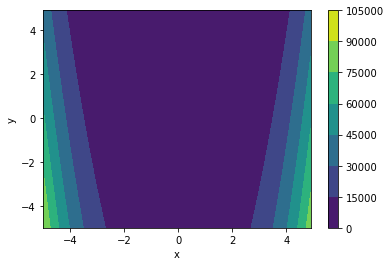

In [74]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.contourf(X, Y, Z)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
#plt.show()

[[ -3.19177018  -1.72323594]
 [ -3.36296592 -10.00399227]
 [  0.14419348   6.18568202]
 [  3.16410654   1.02239362]
 [  0.20992685  -5.85162988]
 [ -0.25464067   1.13103221]
 [  0.61039698   0.67340043]
 [  0.40475058   5.53066733]
 [  1.0632595   -4.04343732]
 [  1.51916124  -5.37147067]]


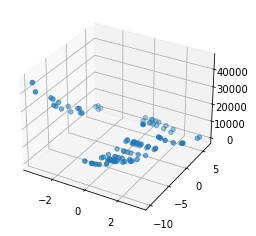

In [75]:
print(positions)

x = [position[0] for position in positions]
y = [position[1] for position in positions]
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X, Y, Z)